This notebook explores the relationship between Internet Movie DataBase scores and The Movie DataBase scores

# Import

In [297]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings; warnings.filterwarnings("ignore")

In [298]:
df = pd.read_csv("/Users/tgut03/Jupyter/Data/Netflix Titles.csv")
scores = ("title", "imdb_score", "tmdb_score")
df.drop(df.columns.difference(scores), axis = 1, inplace = True)
df

,title,imdb_score,tmdb_score
0,Five Came Back: The Reference Films,NaN,NaN
1,Taxi Driver,8.2,8.179
2,Deliverance,7.7,7.300
3,Monty Python and the Holy Grail,8.2,7.811
4,The Dirty Dozen,7.7,7.600
...,...,...,...
5845,Fine Wine,6.8,NaN
5846,C/O Kaadhal,7.7,NaN
5847,Lokillo,3.8,6.300
5848,Dad Stop Embarrassing Me - The Afterparty,NaN,10.000


In [299]:
info = pd.DataFrame()
info["Type"] = df.dtypes
info["Nulls"] = df.isnull().sum()
info["Uniques"] = df.nunique()
info

,Type,Nulls,Uniques
title,object,1,5798
imdb_score,float64,482,80
tmdb_score,float64,311,394


# Transform

In [300]:
# Replace Nulls
med = df.quantile(0.50)
df.fillna(med, inplace = True)

In [301]:
# Remove Duplicates
df["title"].drop_duplicates(inplace = True)

# Explore

In [302]:
# Summary Statistics
IMDB = df["imdb_score"].describe().rename("IMDB")
TMDB = df["tmdb_score"].describe().rename("TMDB")
scoreSummary = pd.concat([IMDB, TMDB], axis = 1)
round(scoreSummary, 1)

,IMDB,TMDB
count,5850.0,5850.0
mean,6.5,6.8
std,1.1,1.1
min,1.5,0.5
25%,5.9,6.2
50%,6.6,6.9
75%,7.3,7.5
max,9.6,10.0


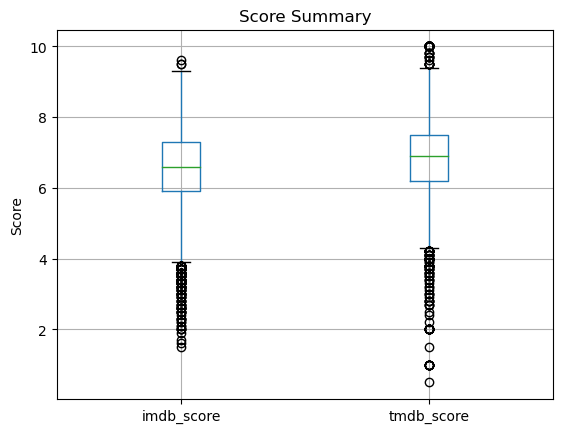

In [303]:
# Boxplot
df.boxplot(column = ["imdb_score", "tmdb_score"], showfliers = True)
plt.ylabel("Score")
plt.title("Score Summary")
plt.show()

In [304]:
# Score Frequency
IMDB = df["imdb_score"].round().value_counts().rename("IMDB")
TMDB = df["tmdb_score"].round().value_counts().rename("TMDB")
scoreFreq = pd.concat([IMDB, TMDB], axis = 1)
scoreFreq

,IMDB,TMDB
7.0,2169.0,2171
6.0,1630.0,1538
8.0,1028.0,1292
5.0,603.0,399
4.0,242.0,116
9.0,95.0,195
3.0,58.0,18
2.0,22.0,19
10.0,3.0,91
1.0,NaN,10


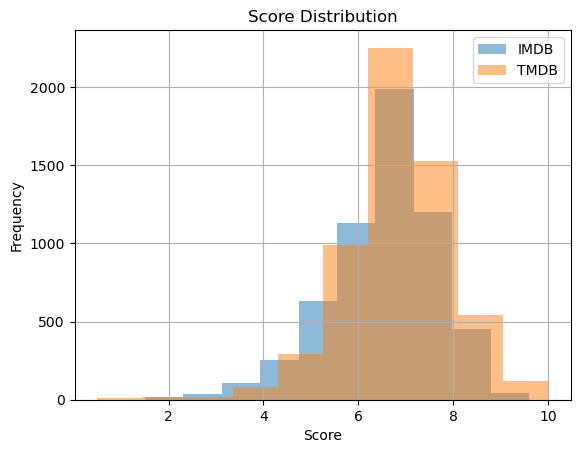

In [305]:
# Histogram
df["imdb_score"].hist(alpha = 0.5, bins = 10, label = "IMDB")
df["tmdb_score"].hist(alpha = 0.5, bins = 10, label = "TMDB")

plt.legend()
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Score Distribution")
plt.show()

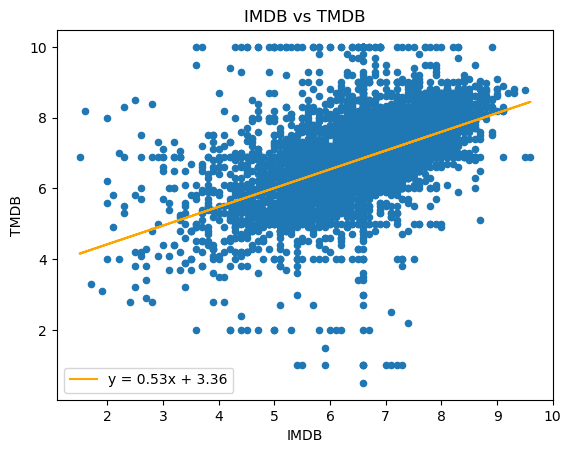

In [306]:
# Scatterplot
df.plot.scatter(x = "imdb_score", y = "tmdb_score")

# Line Of Best Fit
coefficient = np.polyfit(df["imdb_score"], df["tmdb_score"], deg = 1).round(2)
m = coefficient[0] # Slope
b = coefficient[1] # Intercept
linEq = (f"y = {m}x + {b}")

# Plot Linear Equation
plt.plot(df["imdb_score"], m * df["imdb_score"] + b, color = "orange", label = linEq)
plt.title("IMDB vs TMDB")

plt.xlabel("IMDB")
plt.ylabel("TMDB")
plt.legend()
plt.show()

In [307]:
# Correlation
corr = df["imdb_score"].corr(df["tmdb_score"])
round(corr, 2)

0.52

# Results
The relationship between IMDB scores and TMDB scores provides value to netflix enthusiasts who seek reliable ratings and presents an opportunity to merge the 2 associated platforms into 1 integrated user experience